In [1]:
import pandas as pd
import numpy as np
import olac.data_generators as dg
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
def cost_investigation(data_point, decision, salary=-1.0, fraud_label=1):
    correct_label = data_point[-1]
    if  (decision == 1) & (correct_label == fraud_label):
        # we found a fraud label so we investigated in the right way! We made money!
        profit = 4
        loss = 0
    elif (decision == 1) & (correct_label != fraud_label):
        # we did investigate a none fraud case so we lost only the salary
        profit = 0
        loss = 0
    elif (decision == 0) & (correct_label == fraud_label):
        # we missed some fraud this is bad!!!
        profit = 0
        loss = -1
    elif (decision == 0) & (correct_label != fraud_label):
        # we did not investigate no fraud
        profit = 1
        loss = 0
    cost = salary + profit + loss
    return cost

In [145]:
def cost_of_label(data, decision, data_type='point'):
    """
    This function gives back the cost of obtaining a label from the incoming data. It will check if the classification
    of the points one wants to investigate is correct and assesses a profit or loss on each result.
    
    a data point has the format [x,y,label] where label is always the last entry in the list

    Parameters
    ----------
    data : can be either a data point or a array of data points.
    decision : bool or array of bools, investigate a point True or False

    Returns
    -------
    costs for obtaining a certain label of a data point or labels of an array of data points

    """
    if data_type == 'point':
        cost = cost_investigation(data, decision)
        return cost


    elif data_type == 'array':
        # array like data input
        df = pd.DataFrame(list(data))
        df.columns = ['x', 'y', 'label']
        df['decision'] = decision
        df['cost'] = df.apply(lambda x: cost_investigation(x[['x', 'y', 'label']], x['decision']), axis=1)

        return np.array(df['cost'])
    
    
    
    
    
    

In [148]:
cost=[]
for i in range(0,500):
    data = dg.cluster_generator()
    decission = np.random.binomial(1,0.5, size=1001)
    cost.append(cost_of_label(data, decission, data_type='array').sum())

(array([18.,  7., 23., 28., 20., 35., 44., 37., 37., 49., 37., 34., 31.,
        27., 34., 11., 20.,  3.,  3.,  2.]),
 array([-523. , -465.7, -408.4, -351.1, -293.8, -236.5, -179.2, -121.9,
         -64.6,   -7.3,   50. ,  107.3,  164.6,  221.9,  279.2,  336.5,
         393.8,  451.1,  508.4,  565.7,  623. ]),
 <a list of 20 Patch objects>)

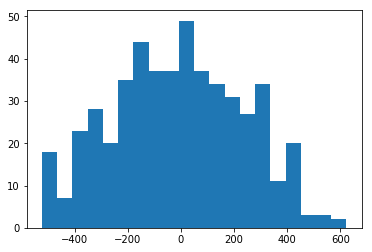

In [149]:
plt.hist(cost, bins=20)

In [152]:
np.mean(cost), np.std(cost)

(-10.736, 245.95721234393596)

In [87]:
data = dg.cluster_generator()

list_tmp= []
for i in data:
    decision = np.random.binomial(1,0.5)
    classification = np.random.binomial(1,0.5)
    list_tmp.append(cost_investigation(i, classification))
print(sum(list_tmp))
    

595.0


(array([149.,   0.,   0.,   0.,   0., 129.,   0.,   0., 383., 340.]),
 array([-2.  , -1.65, -1.3 , -0.95, -0.6 , -0.25,  0.1 ,  0.45,  0.8 ,
         1.15,  1.5 ]),
 <a list of 10 Patch objects>)

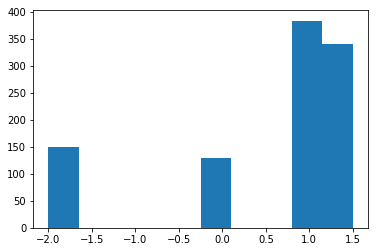

In [88]:
plt.hist(list_tmp)

In [89]:
sum(list_tmp)

595.0